# Case 7: Bayesian Optimal Experimental Design (OED) for model calibration

In [1]:
using BOMBs

### Just to print the nice BOMBS logo


In [2]:
printLogo()


                      ___________   __________   ___  ___   ___________   __________
                     /  _____   /  / ______  /  /   \/   \  \   _____  \  \  _______\
                    /  /____/  /  / /     / /  /          \  \  \____\  \  \ \________
                   /  _____   /  / /     / /  /            \  \   _____  \  \________ \
                  /  /    /  /  / /     / /  /   /\____/\   \  \  \    \  \          \ \
                 /  /____/  /  / /_____/ /  /   /        \   \  \  \____\  \   _______\ \
                /__________/  /_________/  /__ /          \___\  \__________\  \_________\

                


#### Important!
In this case you do not need to generate the model now. Since the utility function also needs to be generated (and requires the experiment specifications) this step will be done later on.

In [3]:
# Generate the empty dictionary with the model_def structure
model_def = defModStruct()

# Fill the different elements of the dictionary with your model specifications. See above how ^
model_def["NameF"] = ["PLacExample"];
model_def["nStat"] = [4];
model_def["nPar"] = [9];
model_def["nInp"] = [1];
model_def["stName"] = ["Cit_mrna","Cit_foldedP","Cit_fluo","Cit_AU"];

model_def["inpName"] = ["IPTG"];

model_def["parName"] = ["alpha1","Vm1","h1","Km1","d1",
                            "alpha2","d2","Kf","sc_molec"];
model_def["eqns"] = ["dCit_mrna=alpha1+Vm1*(IPTG^h1/(Km1^h1+IPTG^h1))-d1*Cit_mrna",
                    "dCit_foldedP=alpha2*Cit_mrna-(d2+Kf)*Cit_foldedP",
                    "dCit_fluo=Kf*Cit_foldedP-d2*Cit_fluo",
                    "dCit_AU = sc_molec*dCit_fluo"];

model_def["Y0eqs"] = ["Cit_mrna = (alpha1 + Vm1*(IPTG^h1/(Km1^h1+IPTG^h1)))/d1;",
                      "Cit_foldedP = (alpha2*Cit_mrna)/(Kf+d2);",
                      "Cit_fluo = (Kf*Cit_foldedP)/d2;",
                      "Cit_AU= sc_molec*Cit_fluo;"]; 

model_def["Y0Sim"] = [];
model_def["tols"] = [1e-9, 1e-9];

### This function gives you information about the structure necessary to generate the model and how to call it. 
If you do not know how to call a specific section, just call the function with no input (infoAll()) to get the information.

In [4]:
infoAll("oedmc")



                CALL defODEModelCalibrStruct()

oedmc_def["Model"] = [];
        # Dict with Model. See Model Generation Section.

oedmc_def["Obs"] = [];
        # States of the model that are observables. This is a vector of strings.These could also be an
        # expression combining states (Only +,-,*,/ and ^ will be considered).

oedmc_def["Theta"] = [];
        # Theta matrix (Bayesian OED) for the model. No single vectors will be allowed.
        # Path to file is also allowed.

oedmc_def["y0"] = [];
        # Array (single simulation) or matrix (multiple simulations) of Y0s for the simulations for each
        # experiment. If you are computing the steady-state this vector might not be used, however, you
        # still need to introduce it with some random numbers.

oedmc_def["preInd"] = [];
        # Vector of numbers with the values for the stimuli (inducer) in the over-night. It might be the case
        # that this entry is not required since only the y0 vector is consid

# OED Model Calibration Example 1
This is a basic example showing how to use the basic elements of the section. <br>
<br>
The experiment to be optimised (find the maximum uncertainty in the simulations) is a 3 step experiment where IPTG for the first step is fixed to 0. <br>
<br>
Since this section is purely based on model uncertainty in simulations, differently from the model selection section, a single theta sample cannot be given since the strategy will not work. <br>
<br>
In the utility function, to compute the simulation uncertainty you can use entropy or percentiles. In this first example we will use percentiles. 

In [5]:
oedmc_def = defODEModelCalibrStruct()

Dict{Any,Any} with 17 entries:
  "maxiter"   => Any[]
  "y0"        => Any[]
  "fixedStep" => Any[]
  "fixedInp"  => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "switchT"   => Any[]
  "Model"     => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]
  "uLower"    => Any[]
  "equalStep" => Any[]
  "tsamps"    => Any[]
  "Theta"     => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "util"      => Any[]

In [6]:
oedmc_def["Model"] = [model_def]; 
oedmc_def["Obs"] = ["3*Cit_AU"];
oedmc_def["Theta"] = ["TestThetaPLac.csv"]; 

oedmc_def["y0"] = [10,10,10,10]; 
oedmc_def["preInd"] = [0]; 
oedmc_def["finalTime"] = [1439]; 
oedmc_def["switchT"] = [[0, 500, 1000, 1439]]; 
oedmc_def["tsamps"] = [collect(0:5:1439)]; 
oedmc_def["fixedInp"] = []; 
oedmc_def["fixedStep"] = [(1,[0])];
oedmc_def["equalStep"] = [];

oedmc_def["plot"] = [true]; 
oedmc_def["flag"] = ["testOEDMS"]; 

oedmc_def["uUpper"] = [100];
oedmc_def["uLower"] = [0]; 
oedmc_def["maxiter"] = [150];

oedmc_def["util"] = [];

This is the function that the section uses to generate the model script and the utility function script. 

In [7]:
oedmc_def =  genOptimMCFuncts(oedmc_def);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for the Model. 
Consider using more samples for better results. 
-------------------------------------------------------------

----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- SCRIPTS OED Model Calibration -----------------------------------------
Utility function script to perform OED for Model Calibration has been generated in the directory: 
E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22\OEDModelCalibrationScripts\PLacExample_OEDMC.jl
-------------------------------------------------------

#### The prints shown above are the same as the ones described in the model selection section, but let's have a quick look at what do they mean
**- WARNING:** Warning indicating that you have introduced a really low number of samples for theta in your Model. 50 samples have been set arbitrally, but this number is still way too low. <br>
**- MODEL GENERATION:**  Generation of the scripts for the model (same as what GenerateModel does). <br>
**- SCRIPTS OED Model Calibration:** Path to the utility function script that has been generated. <br>
**- OPTIMISATION INFO:** Information showing the user how to change the settings of the Bayesian Optimisation package since BOMBS only uses some default settings. Also points to a backup file for how the settings in BOMBS are. 

Here, have a look at how the utility function looks like (to double-check that everything is ok with it).

In [8]:
stream = open(raw"E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-12\OEDModelCalibrationScripts\PLacExample_OEDMC.jl","r");
Model = read(stream,String);
close(stream);
print(Model)


        

    function PLacExampleUtility(ins)

        # Definition of the inputs for the ODEs
        if length(ins) == 1
            IPTG2,IPTG3 = ins[1];
        else
            IPTG2,IPTG3 = ins;
        end
        inputsMC = [0,IPTG2,IPTG3,IPTG2,IPTG3,IPTG2];

        # Solve ODEs
        solMC = PLacExample_SolveAll(tsMC, pD1MC, spMC, inputsMC, ivss1MC, sampsMC, pre1MC);

        # Extracte wanted vectors (observables) with time reduction
        Obs1_MC = 3 .*solMC[:,4,:]; 


    
        EntObs1_MC = zeros(size(solMC)[1]); 


        dists = [Beta, Exponential, LogNormal, Normal, Gamma, Laplace, Pareto, Rayleigh, Cauchy, Uniform];
        dists2 = [Exponential, LogNormal, Normal, Gamma, Laplace, Pareto, Rayleigh, Cauchy, Uniform];

        names = ["timePoint"];

        for j in 1:size(solMC)[1]
            fitts1 = Dict(); 
        bestfit1 = Dict(); 
        bestfitInd1 = zeros(1,1); 

    
            try
                fitts1[names[1]] = fit.(dists, Ref(Obs1_MC[j,:]))

And now, to run the optimisation is as simple as: 

In [9]:
oedmc_res, oedmc_def = mainOEDMC(oedmc_def);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for the Model. 
Consider using more samples for better results. 
-------------------------------------------------------------


┌ Info: 2021-01-22T14:48:06.786	iteration: 10	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:09.723	iteration: 11	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:09.727	iteration: 12	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:09.73	iteration: 13	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:09.736	iteration: 14	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliap

┌ Info: 2021-01-22T14:48:10.027	iteration: 57	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.03	iteration: 58	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.038	iteration: 59	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.066	iteration: 60	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.07	iteration: 61	current optimum: 178143.24265896628
└ @ BayesianOptimization C:\Users\david\.juliapr

┌ Info: 2021-01-22T14:48:10.318	iteration: 109	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.38	iteration: 110	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.387	iteration: 111	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.392	iteration: 112	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:10.399	iteration: 113	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliap

┌ Info: 2021-01-22T14:48:10.712	iteration: 149	current optimum: 178254.4917140989
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info:  ──────────────────────────────────────────────────────────────────────────────
│                                        Time                   Allocations      
│                                ──────────────────────   ───────────────────────
│        Tot / % measured:            20.5s / 96.3%           2.51GiB / 97.4%    
│ 
│  Section               ncalls     time   %tot     avg     alloc   %tot      avg
│  ──────────────────────────────────────────────────────────────────────────────
│  function evaluation      150    13.4s  68.2%  89.6ms   1.39GiB  56.8%  9.48MiB
│  acquisition              141    4.91s  24.9%  34.8ms    886MiB  35.4%  6.28MiB
│  model update             141    694ms  3.52%  4.92ms   97.9MiB  3.91%   711KiB
│  model hyperparamet...    141    


----------------------------------------- RESULTS -----------------------------------------
OED for Model Calibration results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name OEDModelCalibrationResults_testOEDMS.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the names PlotOEDMCResults_Exp1_testOEDMS.png and Plot_OEDMCConvergence_testOEDMS.png
--------------------------------------------------------------------------------------



### First let's have a look at the results structure


In [10]:
oedmc_res

Dict{Any,Any} with 7 entries:
  "BestResOptim" => (observed_optimum = 178254.0, observed_optimizer = [50.3265…
  "uInpOpt"      => Dict{Any,Any}("IPTG"=>Any[0, 50.3265, 54.8133])
  "ResOptim"     => Dict{String,Any}("modelY"=>[177986.0, 137602.0, 178143.0, 1…
  "BestUtil"     => 178254.0
  "ConvCurv"     => [1.0 177986.0; 2.0 177986.0; … ; 149.0 178254.0; 150.0 1782…
  "Simul_MC"     => [0.317361 18.8312 11.9507 823.01; 0.317361 18.8312 11.9507 …
  "SimulObs_MC"  => [2469.03; 2469.03; … ; 49639.3; 49639.3]…

**- BestResOptim:** BayesianOptimisation optimisation results (as they come from the package) for the best iteration

In [11]:
oedmc_res["BestResOptim"]

(observed_optimum = 178254.4917140989, observed_optimizer = [50.326507688580236, 54.81331661283942], model_optimum = 179281.65611076754, model_optimizer = [79.37183716225283, 92.43828576226132])

**- uInpOpt:** Dictionary with an entry for each inducer of the models and the optimised value for each step (if an input is fixed for the whole experiment this will appear only once). <br>
If you have steps fixed to a specific value, this will still be included in this results (it will be the actual values for the experiments, not the optimisation results).

In [12]:
oedmc_res["uInpOpt"]

Dict{Any,Any} with 1 entry:
  "IPTG" => Any[0, 50.3265, 54.8133]

**- ResOptim:** The optimisation structure details from Bayesian Optimisation.

In [13]:
oedmc_res["ResOptim"]

Dict{String,Any} with 12 entries:
  "modelY"             => [177986.0, 137602.0, 178143.0, 169704.0, 177894.0, 17…
  "modelX"             => [68.75 93.75 … 58.2427 26.2789; 81.25 6.25 … 58.5752 …
  "acquisitionoptions" => (method = :LD_LBFGS, restarts = 10, maxeval = 2000)
  "duration"           => DurationCounter(1.61133e9, Inf, 1.61133e9, Inf)
  "repetitions"        => 1
  "model_optimum"      => 179282.0
  "sense"              => Max
  "modeloptimizer"     => MAPGPOptimizer{NamedTuple{(:domean, :kern, :noise, :l…
  "model_optimizer"    => [79.3718, 92.4383]
  "upperbounds"        => [100.0, 100.0]
  "observed_optimizer" => [50.3265, 54.8133]
  "observed_optimum"   => 178254.0

**- Simul_MC:** Simulation of the model using the optimum input profile. 

In [14]:
oedmc_res["Simul_MC"]

288×4×3 Array{Float64,3}:
[:, :, 1] =
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 0.317361   18.8312   11.9507    823.01
 ⋮                             
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597   240.266   16546.4
 6.38048   378.597  

**- BestUtil:** Best utility function value

In [15]:
oedmc_res["BestUtil"]

178254.4917140989

**- ConvCurv:** Convergence curve for the optimisation. First column indicates iteration and second column best utility function so far. 

In [16]:
oedmc_res["ConvCurv"]

150×2 Array{Float64,2}:
   1.0  177986.0
   2.0  177986.0
   3.0  178143.0
   4.0  178143.0
   5.0  178143.0
   6.0  178143.0
   7.0  178143.0
   8.0  178143.0
   9.0  178143.0
  10.0  178143.0
  11.0  178143.0
  12.0  178143.0
  13.0  178143.0
   ⋮    
 139.0  178254.0
 140.0  178254.0
 141.0  178254.0
 142.0  178254.0
 143.0  178254.0
 144.0  178254.0
 145.0  178254.0
 146.0  178254.0
 147.0  178254.0
 148.0  178254.0
 149.0  178254.0
 150.0  178254.0

**- SimulObs_MC:** Simulation of the observables for the model using the optimum input profile. 

In [17]:
oedmc_res["SimulObs_MC"]

288×1×3 Array{Float64,3}:
[:, :, 1] =
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
  2469.0287158650076
     ⋮
 49639.2398850115
 49639.24171429684
 49639.24330034957
 49639.244674736474
 49639.24586584912
 49639.246898903846
 49639.24779580768
 49639.248574007855
 49639.24924833384
 49639.249832325106
 49639.25033824249
 49639.250777068344

[:, :, 2] =
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
  2345.5772800717577
     ⋮
 47029.42352631064
 47029.426510920166
 47029.4291184356
 47029.431397188106
 47029.43338725343
 47029.43512439647
 47029.43664087761
 47029.43796545272
 470

### Now, let's have a look at the plots generated
First, the convergence curve <br>
Note that to reduce the computational time of the example we used a really low number of iterations, so do not be surprised if the results do not look good.

In [18]:
using Images # Package not called in BOMBS, this is just to display the generated PNGs

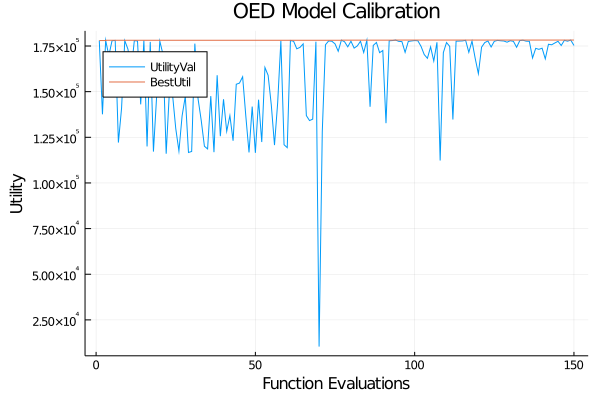

In [19]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC1 = load(string(oedmc_def["savepath"], "\\Plot_OEDMCConvergence_",oedmc_def["flag"],".png"))

And now the experiment simulations

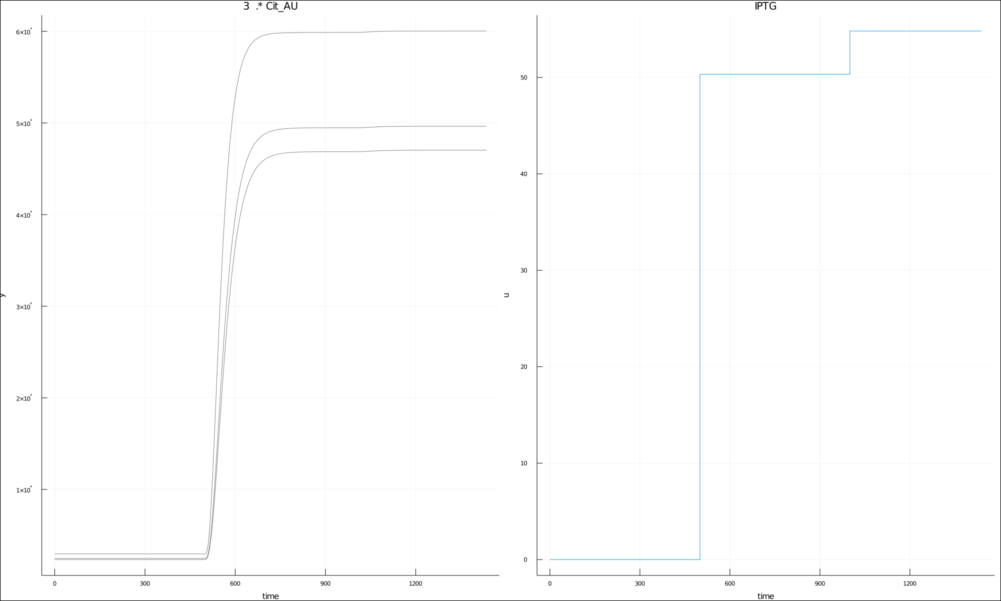

In [20]:
expMC = load(string(oedmc_def["savepath"], "\\PlotOEDMCResults_Exp1_",oedmc_def["flag"],".png"))

# OED Model Calibration Example 2
This is a basic example showing how to use the basic elements of the section. <br>
<br>
The experiment to be optimised (find the maximum uncertainty in the simulations) is a pulse experiment where IPTG for the first step is fixed to 0. <br>
<br>
Since this section is purely based on model uncertainty in simulations, differently from the model selection section, a single theta sample cannot be given since the strategy will not work. <br>
<br>
In the utility function, to compute the simulation uncertainty you can use entropy or percentiles. In this first example we will use entropy. 

In [21]:
oedmc_def2 = defODEModelCalibrStruct()

Dict{Any,Any} with 17 entries:
  "maxiter"   => Any[]
  "y0"        => Any[]
  "fixedStep" => Any[]
  "fixedInp"  => Any[]
  "Obs"       => Any[]
  "uUpper"    => Any[]
  "switchT"   => Any[]
  "Model"     => Any[]
  "preInd"    => Any[]
  "finalTime" => Any[]
  "uLower"    => Any[]
  "equalStep" => Any[]
  "tsamps"    => Any[]
  "Theta"     => Any[]
  "flag"      => Any[]
  "plot"      => Any[]
  "util"      => Any[]

In [22]:
oedmc_def2["Model"] = [model_def]; 
oedmc_def2["Obs"] = ["3*Cit_AU"];
oedmc_def2["Theta"] = ["TestThetaPLac.csv"]; 

oedmc_def2["y0"] = [10,10,10,10]; 
oedmc_def2["preInd"] = [0]; 
oedmc_def2["finalTime"] = [1439]; 
oedmc_def2["switchT"] = [[0, 250, 500, 750, 1000, 1200, 1439]]; 
oedmc_def2["tsamps"] = [collect(0:5:1439)]; 
oedmc_def2["fixedInp"] = []; 
oedmc_def2["fixedStep"] = [(1,[0])]; # If you had more inducers, you coud set some of them as Any to optimise them while you fix the others
oedmc_def2["equalStep"] = [[2,4,6],[3,5]];

oedmc_def2["plot"] = [true]; 
oedmc_def2["flag"] = ["testOEDMS2"]; 

oedmc_def2["uUpper"] = [100];
oedmc_def2["uLower"] = [0]; 
oedmc_def2["maxiter"] = [150];

oedmc_def2["util"] = ["entropy"];

This is the function that the section uses to generate the model script and the utility function script. 

In [23]:
oedmc_def2 =  genOptimMCFuncts(oedmc_def2);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for the Model. 
Consider using more samples for better results. 
-------------------------------------------------------------

----------------------------------------- MODEL GENERATION -----------------------------------------
The model has been generated in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\ModelsFunctions\PLacExample_Model.jl
--------------------------------------------------------------------------------------


----------------------------------------- SCRIPTS OED Model Calibration -----------------------------------------
Utility function script to perform OED for Model Calibration has been generated in the directory: 
E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22\OEDModelCalibrationScripts\PLacExample_OEDMC.jl
-------------------------------------------------------

Here, have a look at how the utility function looks like (to double-check that everything is ok with it).

In [24]:
stream = open(raw"E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-12\OEDModelCalibrationScripts\PLacExample_OEDMC.jl","r");
Model = read(stream,String);
close(stream);
print(Model)


        

    function PLacExampleUtility(ins)

        # Definition of the inputs for the ODEs
        if length(ins) == 1
            IPTG2,IPTG3 = ins[1];
        else
            IPTG2,IPTG3 = ins;
        end
        inputsMC = [0,IPTG2,IPTG3,IPTG2,IPTG3,IPTG2];

        # Solve ODEs
        solMC = PLacExample_SolveAll(tsMC, pD1MC, spMC, inputsMC, ivss1MC, sampsMC, pre1MC);

        # Extracte wanted vectors (observables) with time reduction
        Obs1_MC = 3 .*solMC[:,4,:]; 


    
        EntObs1_MC = zeros(size(solMC)[1]); 


        dists = [Beta, Exponential, LogNormal, Normal, Gamma, Laplace, Pareto, Rayleigh, Cauchy, Uniform];
        dists2 = [Exponential, LogNormal, Normal, Gamma, Laplace, Pareto, Rayleigh, Cauchy, Uniform];

        names = ["timePoint"];

        for j in 1:size(solMC)[1]
            fitts1 = Dict(); 
        bestfit1 = Dict(); 
        bestfitInd1 = zeros(1,1); 

    
            try
                fitts1[names[1]] = fit.(dists, Ref(Obs1_MC[j,:]))

And now, to run the optimisation is as simple as: 

In [25]:
oedmc_res2, oedmc_def2 = mainOEDMC(oedmc_def2);

-------------------------- WARNING --------------------------
Less than 50 samples for theta are given for the Model. 
Consider using more samples for better results. 
-------------------------------------------------------------


┌ Info: 2021-01-22T14:48:51.983	iteration: 10	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.008	iteration: 11	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.02	iteration: 12	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.034	iteration: 13	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.048	iteration: 14	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliap

┌ Info: 2021-01-22T14:48:52.602	iteration: 48	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.668	iteration: 49	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.683	iteration: 50	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.698	iteration: 51	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:52.713	iteration: 52	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.julia

┌ Info: 2021-01-22T14:48:53.409	iteration: 89	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:53.429	iteration: 90	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:53.452	iteration: 91	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:53.471	iteration: 92	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:53.488	iteration: 93	current optimum: 2566.6240827378306
└ @ BayesianOptimization C:\Users\david\.julia

┌ Info: 2021-01-22T14:48:54.348	iteration: 133	current optimum: 2566.6803869242167
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:54.364	iteration: 134	current optimum: 2566.6803869242167
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:54.381	iteration: 135	current optimum: 2566.6803869242167
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:54.396	iteration: 136	current optimum: 2566.6803869242167
└ @ BayesianOptimization C:\Users\david\.juliapro\JuliaPro_v1.4.0-1\packages\BayesianOptimization\poykT\src\BayesianOptimization.jl:140
┌ Info: 2021-01-22T14:48:54.413	iteration: 137	current optimum: 2566.6803869242167
└ @ BayesianOptimization C:\Users\david\.


----------------------------------------- RESULTS -----------------------------------------
OED for Model Calibration results are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the name OEDModelCalibrationResults_testOEDMS2.jld
--------------------------------------------------------------------------------------


----------------------------------------- PLOTS -----------------------------------------
PLOTS are saved in the directory: 
                 E:\UNI\D_Drive\PhD\JULIAlang\Generalisation_PLacExample\Examples\Results\PLacExample_2021-01-22
Under the names PlotOEDMCResults_Exp1_testOEDMS2.png and Plot_OEDMCConvergence_testOEDMS2.png
--------------------------------------------------------------------------------------



### Now, let's have a look at the plots generated
First, the convergence curve <br>
Note that to reduce the computational time of the example we used a really low number of iterations, so do not be surprised if the results do not look good.

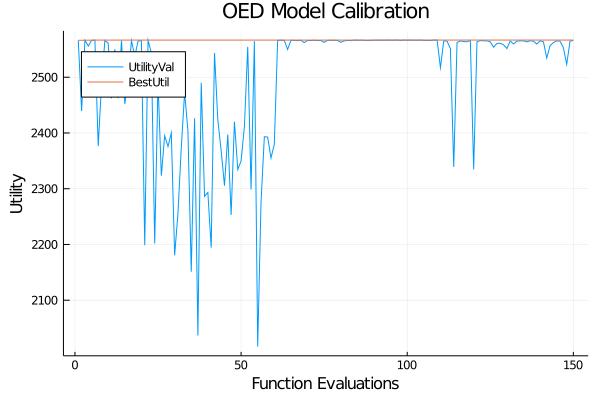

In [26]:
# Note that none of the curves are at convergence due to the low time allowed for the optimisation. 
CC2 = load(string(oedmc_def2["savepath"], "\\Plot_OEDMCConvergence_",oedmc_def2["flag"],".png"))

And now the experiment simulations

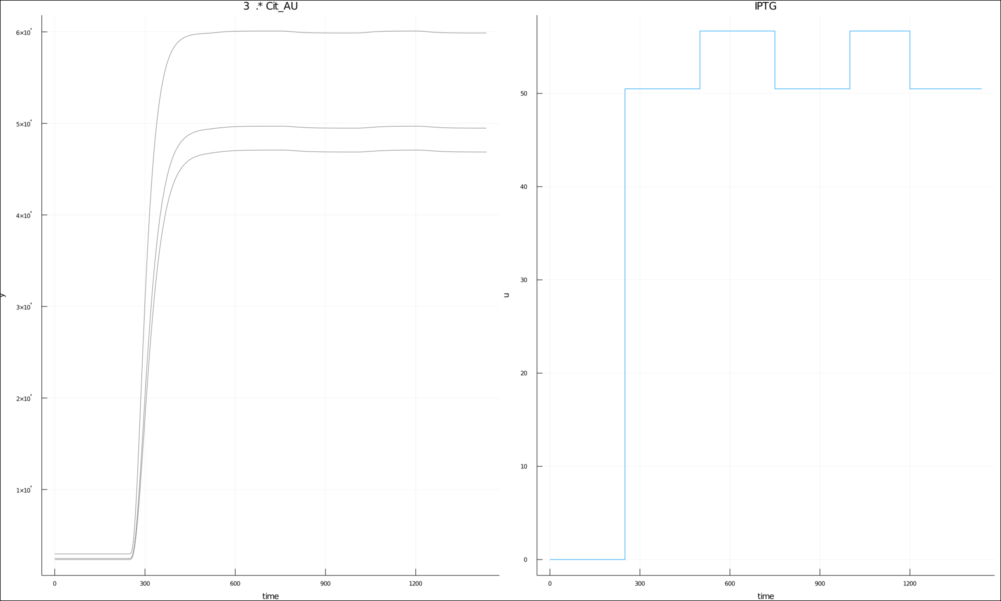

In [27]:
expMC2 = load(string(oedmc_def2["savepath"], "\\PlotOEDMCResults_Exp1_",oedmc_def2["flag"],".png"))

### This is the end of the section. Look at the cool logo to check the package version ;) 


In [28]:
versionBOMBS()


                                                  *
                                    **           * *           *                          **
                                   * *          *   *         * *                       **  *
                                  *  *         *    *        *  **                    **     *
                         *       *   *  *   ***     *     ***    **                 **        *      *
                        * *     *    * * * *         **  *         **      *      **           *    * *   ***
                       *   *   *     **   *            **            **   * * ****              ****   ***   ***
                   ** *     ***                                        * *   *                                  *
                  *  *                                                  *                                        *
                 *            ___________   __________   ___  ___   ___________   __________                  